In [1]:
names = open('names.txt').read().splitlines()

In [2]:
names[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [3]:
len(names)
min(len(name) for name in names)
max(len(name) for name in names)

15

In [4]:
b = {}
for name in names:
    chs = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [5]:
sorted(b.items(), key=lambda x:-x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [7]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [8]:
chars = sorted(list(set("".join(names))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi["."] = 0

itos = {i:s for s, i in stoi.items()}

In [9]:

for name in names:
    chs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        N[i1, i2] += 1


(-0.5, 27.5, 27.5, -0.5)

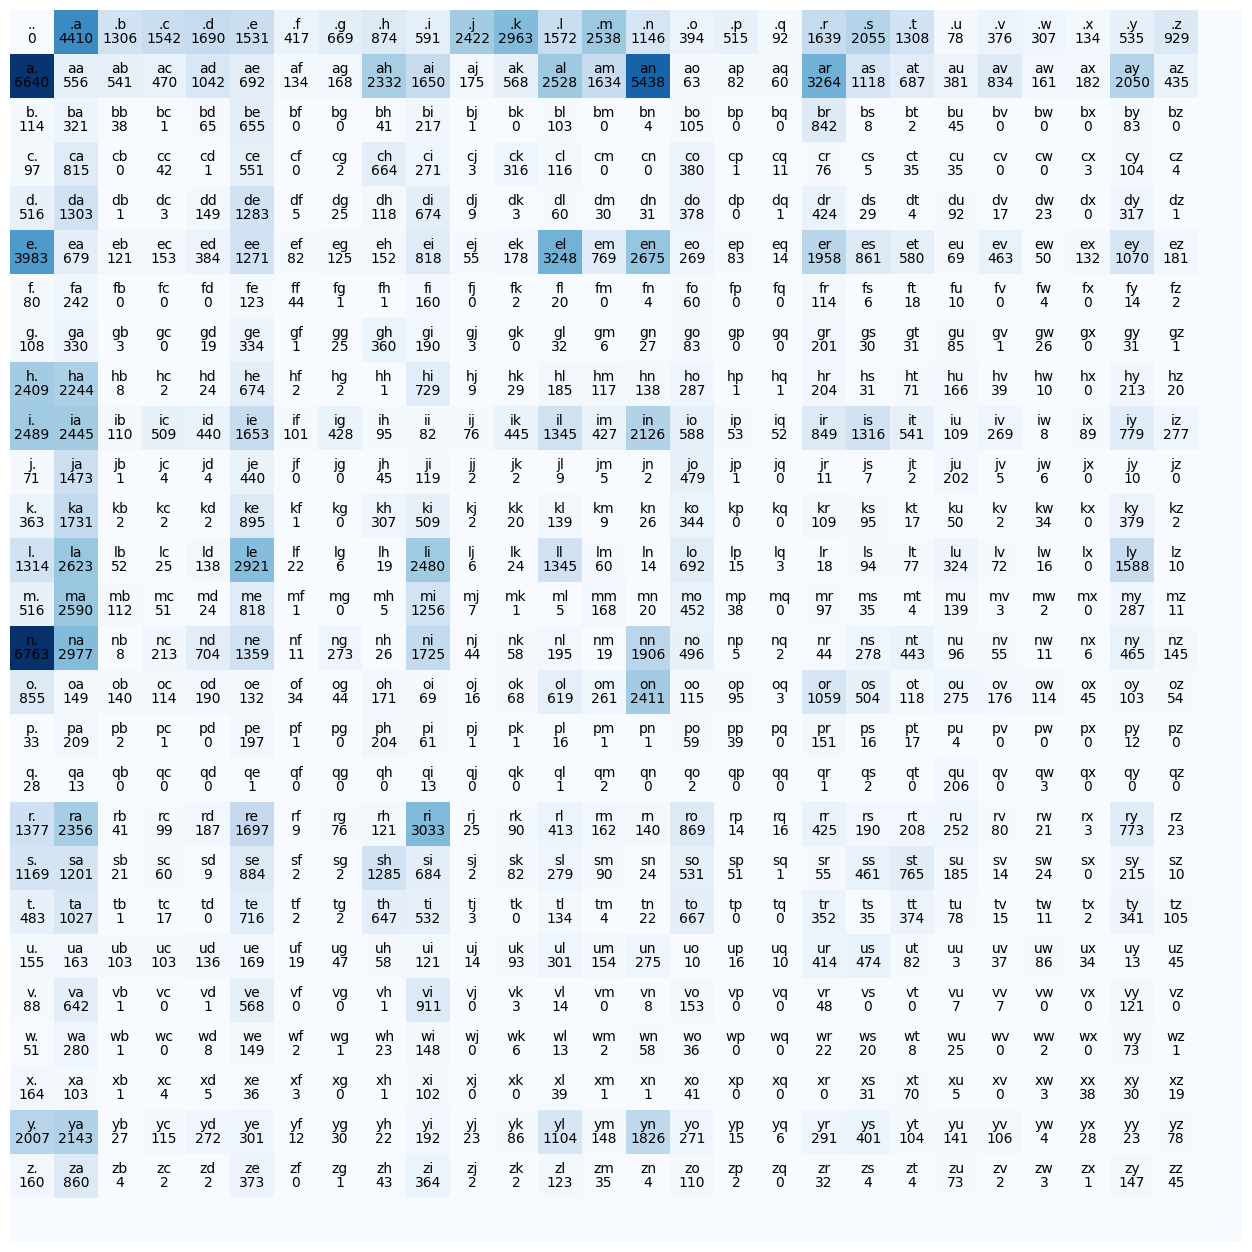

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='black')

plt.axis('off')

In [11]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [12]:
p = N[0].float()
p = p/ p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [13]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [23]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [30]:
torch.multinomial(p, num_samples=10, replacement=True, generator=g)

tensor([1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [22]:
g = torch.Generator().manual_seed(2147483647)


for i in range(15):
    op = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        op.append(itos[ix])
        if ix == 0:
            break

    print("".join(op))

cava.
ayamaijowy.
aianeta.
rl.
miryndardyrioma.
kiinninaswila.
en.
ahlanyanlen.
tav.
sissth.
eygerinan.
sullyukrbrilahubrnidrianelkheyneligalah.
ka.
f.
elah.
